code by Jakob

In [21]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
data_dir = "data/"
dataframe_dir = data_dir + "dataframes/"
speeches_dir = data_dir + "speeches/"
speeches_pdf_dir = speeches_dir + "pdf/"
speeches_txt_dir = speeches_dir + "txt/"
speeches_extracted_dir = speeches_dir + "extracted/"
metadata_step_SR = 'metadata_s02'
metadata_step_dpi = 'metadata_s03'
metadata_step_extr = 'metadata_s04'

In [74]:
metadata_SR = pd.read_csv(f'{dataframe_dir}/{metadata_step_SR}.csv')
metadata_dpi = pd.read_csv(f'{dataframe_dir}/{metadata_step_dpi}.csv')
metadata_extracted = pd.read_csv(f'{dataframe_dir}/{metadata_step_extr}.csv')

In [12]:
ordered_sgs = ['Guterres, António, 1949-', 'Ban, Ki-moon, 1944-', 'Annan, Kofi, 1938-2018', 'Boutros-Ghali, Boutros, 1922-2016',
       'Pérez de Cuéllar, Javier, 1920-2020', 'Waldheim, Kurt, 1918-2007', 'Thant, U, 1909-1974', 
       'Hammarskjöld, Dag, 1905-1961', 'Lie, Trygve, 1896-1968']

# Graphs

## About the PDF documents before we extracted the speeches from them

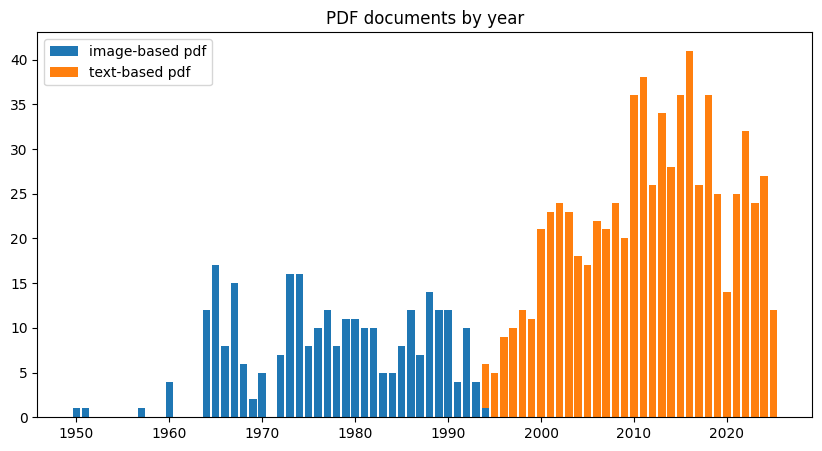

In [75]:
pldf = metadata_dpi.copy()
pldf = pldf.groupby(["year", "text_based"])['speaker'].count().reset_index(name='countv')
pldf = pldf.sort_values("year")
years = sorted(pldf.year.unique())
pldf_text = pldf[pldf.text_based == True].set_index('year')['countv'].reindex(years, fill_value=0)
pldf_image = pldf[pldf.text_based == False].set_index('year')['countv'].reindex(years, fill_value=0)

plt.figure(figsize=(10,5))
plt.title("PDF documents by year")
plt.bar(years, pldf_image, label='image-based pdf')
plt.bar(years, pldf_text, bottom=(pldf_image), label='text-based pdf')
plt.legend()
plt.show()

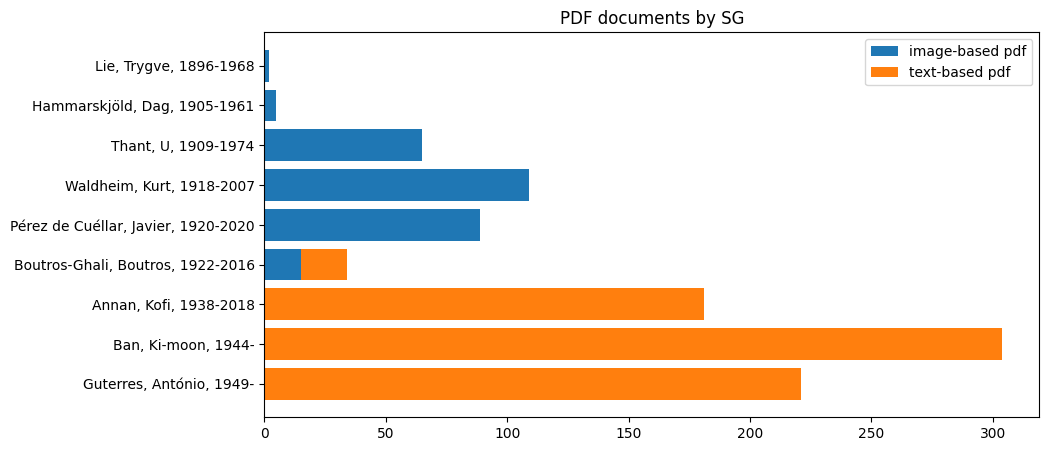

,speaker,sg_number,text_based,countv
4,"Guterres, António, 1949-",9,True,221
1,"Ban, Ki-moon, 1944-",8,True,304
0,"Annan, Kofi, 1938-2018",7,True,181
3,"Boutros-Ghali, Boutros, 1922-2016",6,True,19
2,"Boutros-Ghali, Boutros, 1922-2016",6,False,15
7,"Pérez de Cuéllar, Javier, 1920-2020",5,False,89
9,"Waldheim, Kurt, 1918-2007",4,False,109
8,"Thant, U, 1909-1974",3,False,65
5,"Hammarskjöld, Dag, 1905-1961",2,False,5
6,"Lie, Trygve, 1896-1968",1,False,2


In [76]:
pldf = metadata_dpi.copy()
pldf = pldf.groupby(["speaker", "sg_number", "text_based"])['sg_number'].count().reset_index(name='countv')
pldf = pldf.sort_values("sg_number")
speaker = sorted(pldf.speaker.unique())
pldf_text = pldf[pldf.text_based == True].set_index('speaker')['countv'].reindex(ordered_sgs, fill_value=0)
pldf_image = pldf[pldf.text_based == False].set_index('speaker')['countv'].reindex(ordered_sgs, fill_value=0)

plt.figure(figsize=(10,5))
plt.title("PDF documents by SG")
plt.barh(ordered_sgs, pldf_image, label='image-based pdf')
plt.barh(ordered_sgs, pldf_text, left=pldf_image, label='text-based pdf')
plt.legend()
plt.show()

pldf.sort_values("sg_number", ascending=False)

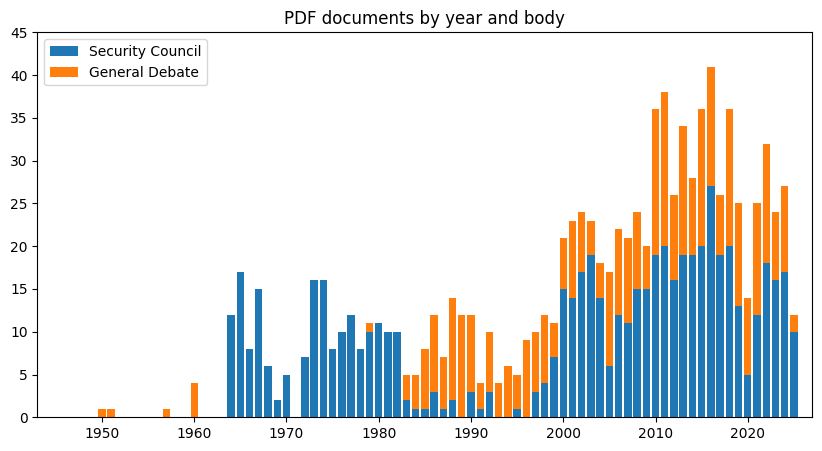

In [101]:
pldf = metadata_dpi.copy()
pldf = pldf.groupby(["year", "body"])['speaker'].count().reset_index(name='countv')
pldf = pldf.sort_values("year")
years = sorted(pldf.year.unique())
# body_e = pldf[pldf.body == 'E'].set_index('year')['countv'].reindex(years, fill_value=0)
body_a = pldf[pldf.body == 'A'].set_index('year')['countv'].reindex(years, fill_value=0)
body_s = pldf[pldf.body == 'S'].set_index('year')['countv'].reindex(years, fill_value=0)
plt.figure(figsize=(10,5))
plt.title("PDF documents by year and body")
plt.bar(years, body_s, label='Security Council')
plt.bar(years, body_a, bottom=body_s, label='General Debate')
# plt.bar(years, body_e, bottom=(body_s+body_a), label='Economic')
plt.xlim((1943, 2027))
plt.ylim((0,45))
plt.legend()
plt.show()

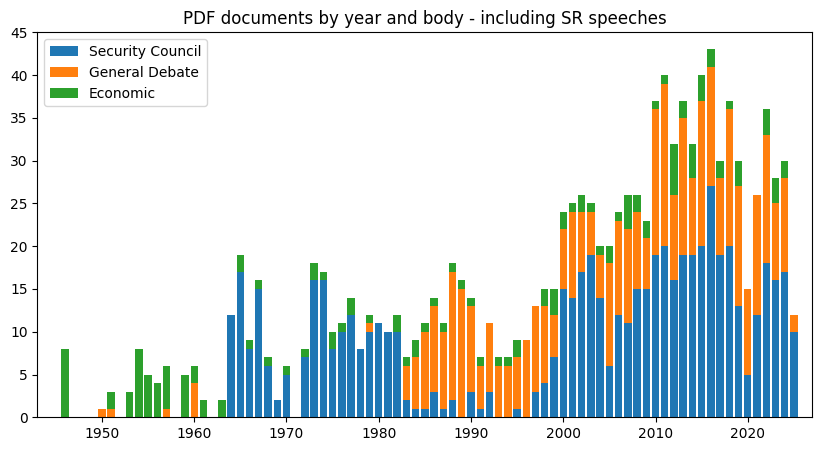

In [100]:
pldf = metadata_SR.copy()
pldf = pldf.groupby(["year", "body"])['speaker'].count().reset_index(name='countv')
pldf = pldf.sort_values("year")
years = sorted(pldf.year.unique())
body_e = pldf[pldf.body == 'E'].set_index('year')['countv'].reindex(years, fill_value=0)
body_a = pldf[pldf.body == 'A'].set_index('year')['countv'].reindex(years, fill_value=0)
body_s = pldf[pldf.body == 'S'].set_index('year')['countv'].reindex(years, fill_value=0)
plt.figure(figsize=(10,5))
plt.title("PDF documents by year and body - including SR speeches")
plt.bar(years, body_s, label='Security Council')
plt.bar(years, body_a, bottom=body_s, label='General Debate')
plt.bar(years, body_e, bottom=(body_s+body_a), label='Economic')
plt.xlim((1943, 2027))
plt.ylim((0,45))
plt.legend()
plt.show()

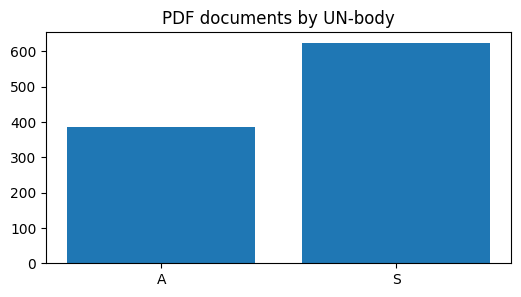

,body,countv
0,A,387
1,S,623


In [99]:
pldf = metadata_dpi.copy()
pldf = pldf.groupby("body")['speaker'].count().reset_index(name='countv')
pldf = pldf.sort_values("body")
plt.figure(figsize=(6,3))
plt.title("PDF documents by UN-body")
plt.bar(pldf.body, pldf.countv)
plt.show()

pldf

## About the extracted speeches
so far only includes the text-based extraction part

In [144]:
def add_text_based_sgs_lines(plt):
    plt.axvline(2017, linestyle="--", linewidth=1, alpha=0.8)
    plt.text(2017,plt.ylim()[1],"Guterres, António", verticalalignment="top", horizontalalignment="left")
    plt.axvline(2007, linestyle="--", linewidth=1, alpha=0.8)
    plt.text(2007,plt.ylim()[1],"Ban, Ki-moon", verticalalignment="top", horizontalalignment="left")
    plt.axvline(1997, linestyle="--", linewidth=1, alpha=0.8)
    plt.text(1997,plt.ylim()[1],"Annan, Kofi", verticalalignment="top", horizontalalignment="left")
    plt.axvline(1992, linestyle="--", linewidth=1, alpha=0.8)
    plt.text(1992,plt.ylim()[1],"Boutros-Ghali", verticalalignment="top", horizontalalignment="left")


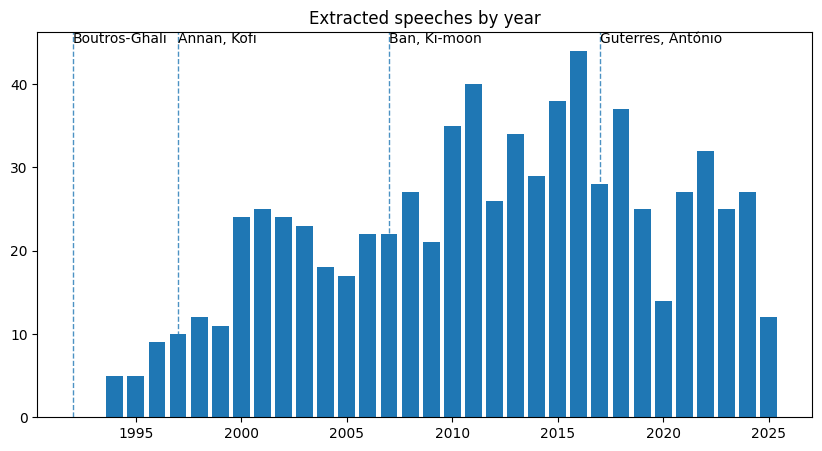

In [143]:
pldf = metadata_extracted.copy()
pldf = pldf.groupby(["year", "text_based"])['speaker'].count().reset_index(name='countv')
pldf = pldf.sort_values("year")
years = sorted(pldf.year.unique())
pldf_text = pldf[pldf.text_based == True].set_index('year')['countv'].reindex(years, fill_value=0)
pldf_image = pldf[pldf.text_based == False].set_index('year')['countv'].reindex(years, fill_value=0)

plt.figure(figsize=(10,5))
plt.title("Extracted speeches by year")
plt.bar(years, pldf_text)
add_text_based_sgs_lines(plt)
# plt.bar(years, pldf_image, label='image-based pdf')
# plt.bar(years, pldf_text, bottom=(pldf_image), label='text-based pdf')
# plt.legend()
plt.show()

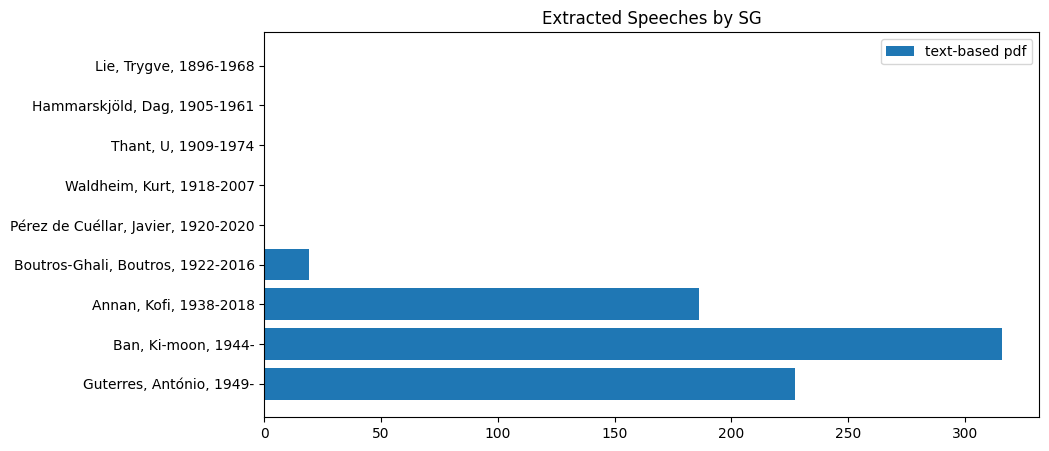

,speaker,sg_number,text_based,countv
3,"Guterres, António, 1949-",9,True,227
1,"Ban, Ki-moon, 1944-",8,True,316
0,"Annan, Kofi, 1938-2018",7,True,186
2,"Boutros-Ghali, Boutros, 1922-2016",6,True,19


In [ ]:
pldf = metadata_extracted.copy()
pldf = pldf.groupby(["speaker", "sg_number", "text_based"])['sg_number'].count().reset_index(name='countv')
pldf = pldf.sort_values("sg_number")
speaker = sorted(pldf.speaker.unique())
pldf_text = pldf[pldf.text_based == True].set_index('speaker')['countv'].reindex(ordered_sgs, fill_value=0)
pldf_image = pldf[pldf.text_based == False].set_index('speaker')['countv'].reindex(ordered_sgs, fill_value=0)

plt.figure(figsize=(10,5))
plt.title("Extracted speeches by SG")
# plt.barh(ordered_sgs, pldf_image, label='image-based pdf')
plt.barh(ordered_sgs, pldf_text, left=pldf_image, label='text-based pdf')
plt.legend()
plt.show()

pldf.sort_values("sg_number", ascending=False)

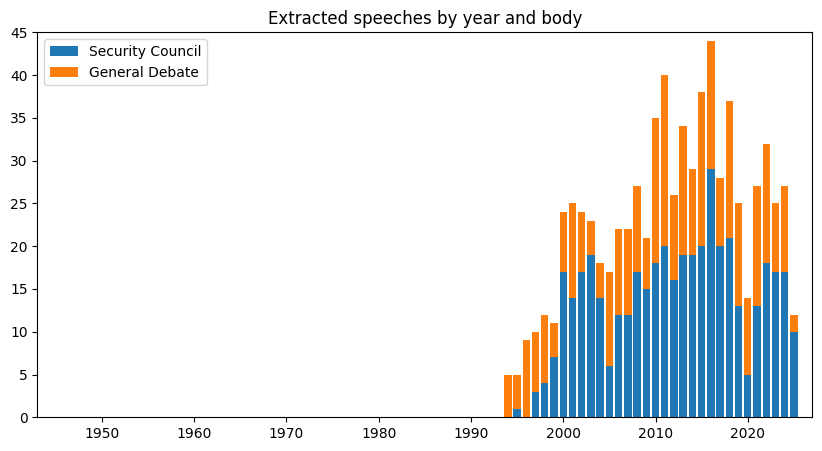

In [148]:
pldf = metadata_extracted.copy()
pldf = pldf.groupby(["year", "body"])['speaker'].count().reset_index(name='countv')
pldf = pldf.sort_values("year")
years = sorted(pldf.year.unique())
# body_e = pldf[pldf.body == 'E'].set_index('year')['countv'].reindex(years, fill_value=0)
body_a = pldf[pldf.body == 'A'].set_index('year')['countv'].reindex(years, fill_value=0)
body_s = pldf[pldf.body == 'S'].set_index('year')['countv'].reindex(years, fill_value=0)
plt.figure(figsize=(10,5))
plt.title("Extracted speeches by year and body")
plt.bar(years, body_s, label='Security Council')
plt.bar(years, body_a, bottom=body_s, label='General Debate')
# plt.bar(years, body_e, bottom=(body_s+body_a), label='Economic')
plt.xlim((1943, 2027))
plt.ylim((0,45))
plt.legend()
plt.show()

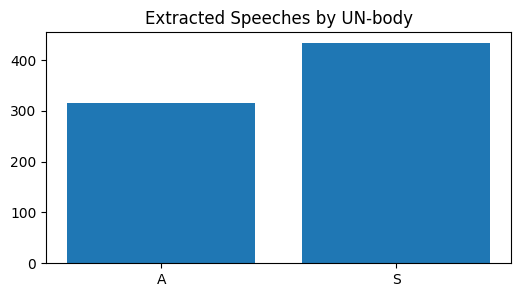

,body,countv
0,A,315
1,S,433


In [ ]:
pldf = metadata_extracted.copy()
pldf = pldf.groupby("body")['speaker'].count().reset_index(name='countv')
pldf = pldf.sort_values("body")
plt.figure(figsize=(6,3))
plt.title("Extracted speeches by UN-body")
plt.bar(pldf.body, pldf.countv)
plt.show()

pldf

## more analysis about tokens, types and sentences

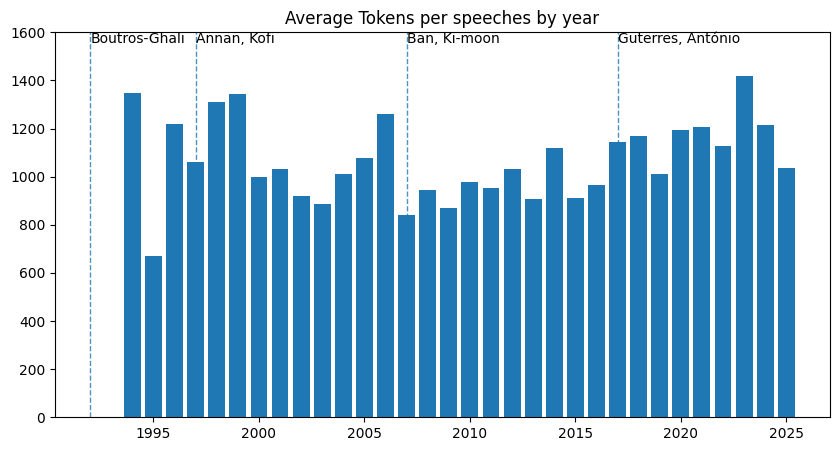

In [142]:
pldf = metadata_extracted.copy()
pldf = pldf.groupby(["year", "text_based"])['tokens'].mean().reset_index(name='countv')
pldf = pldf.sort_values("year")
years = sorted(pldf.year.unique())
pldf_text = pldf[pldf.text_based == True].set_index('year')['countv'].reindex(years, fill_value=0)
pldf_image = pldf[pldf.text_based == False].set_index('year')['countv'].reindex(years, fill_value=0)

plt.figure(figsize=(10,5))
plt.title("Average Tokens per speeches by year")
# plt.bar(years, pldf_image, label='image-based pdf')
# plt.bar(years, pldf_text, bottom=(pldf_image), label='text-based pdf')
plt.bar(years, pldf_text)
plt.ylim((0,1600))
add_text_based_sgs_lines(plt)

# plt.legend()
plt.show()

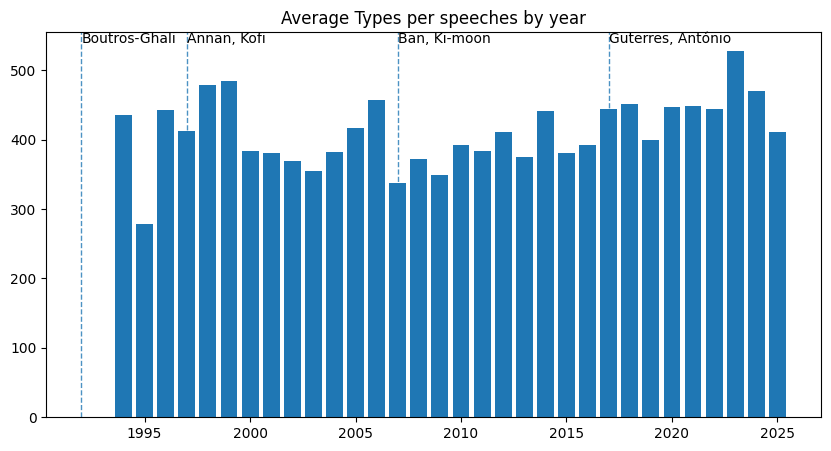

In [ ]:
pldf = metadata_extracted.copy()
pldf = pldf.groupby(["year", "text_based"])['types'].mean().reset_index(name='countv')
pldf = pldf.sort_values("year")
years = sorted(pldf.year.unique())
pldf_text = pldf[pldf.text_based == True].set_index('year')['countv'].reindex(years, fill_value=0)
pldf_image = pldf[pldf.text_based == False].set_index('year')['countv'].reindex(years, fill_value=0)

plt.figure(figsize=(10,5))
plt.title("Average Types per speeches by year")
# plt.bar(years, pldf_image, label='image-based pdf')
# plt.bar(years, pldf_text, bottom=(pldf_image), label='text-based pdf')
plt.bar(years, pldf_text)
add_text_based_sgs_lines(plt)
# plt.legend()
plt.show()

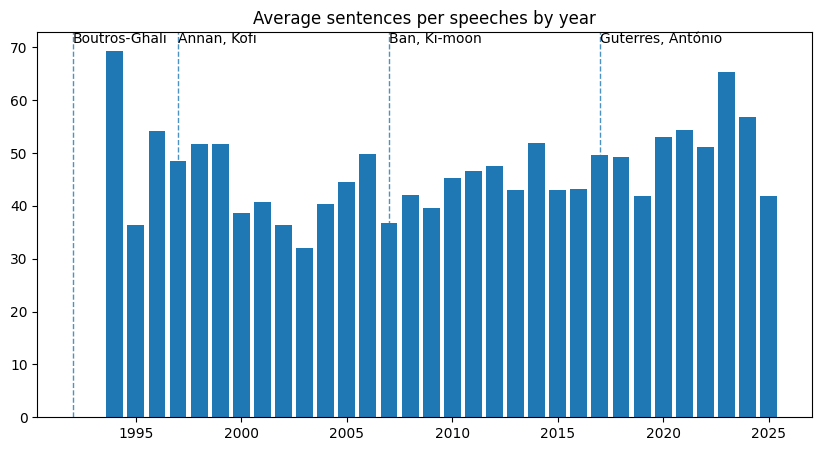

In [153]:
pldf = metadata_extracted.copy()
pldf = pldf.groupby(["year", "text_based"])['sentences'].mean().reset_index(name='countv')
pldf = pldf.sort_values("year")
years = sorted(pldf.year.unique())
pldf_text = pldf[pldf.text_based == True].set_index('year')['countv'].reindex(years, fill_value=0)
pldf_image = pldf[pldf.text_based == False].set_index('year')['countv'].reindex(years, fill_value=0)

plt.figure(figsize=(10,5))
plt.title("Average sentences per speeches by year")
# plt.bar(years, pldf_image, label='image-based pdf')
# plt.bar(years, pldf_text, bottom=(pldf_image), label='text-based pdf')
plt.bar(years, pldf_text)
add_text_based_sgs_lines(plt)
# plt.legend()
plt.show()

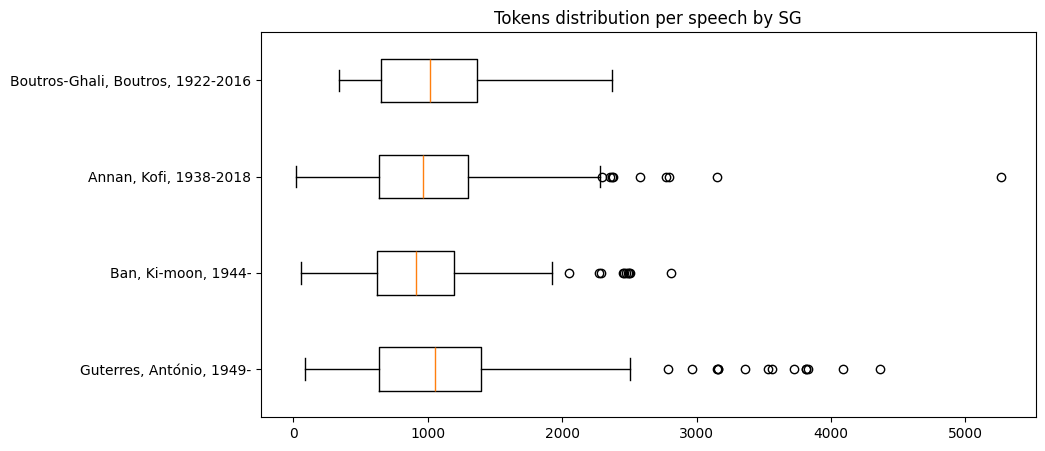

In [ ]:
order_sg_subset = ordered_sgs[0:4]
pldf = metadata_extracted.copy()
pldf_bxpl = [
    pldf[pldf.speaker == sg]["tokens"].dropna()
    for sg in order_sg_subset
    ]

plt.figure(figsize=(10,5))
plt.title("Tokens distribution per speech by SG")
conseal_output = plt.boxplot(
    pldf_bxpl,
    vert=False,
    tick_labels=order_sg_subset
    
)

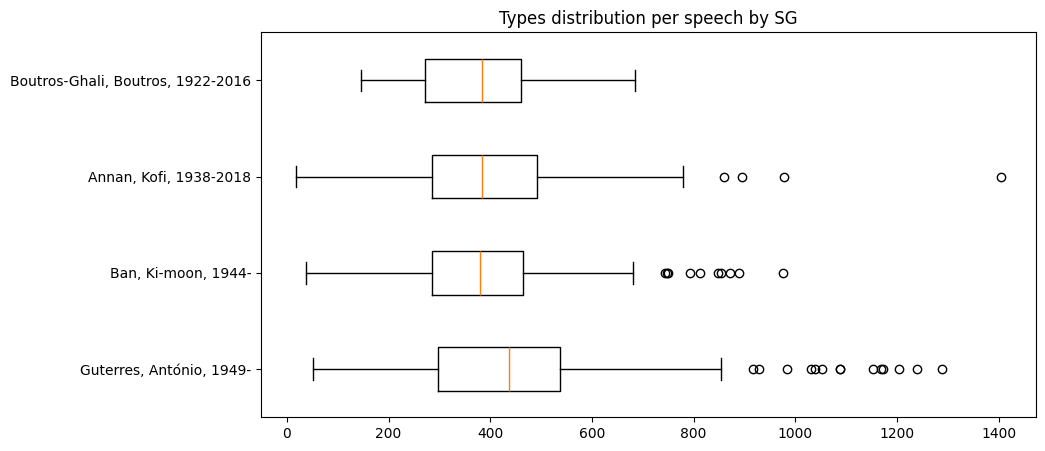

In [ ]:
order_sg_subset = ordered_sgs[0:4]
pldf = metadata_extracted.copy()
pldf_bxpl = [
    pldf[pldf.speaker == sg]["types"].dropna()
    for sg in order_sg_subset
    ]

plt.figure(figsize=(10,5))
plt.title("Types distribution per speech by SG")
conseal_output = plt.boxplot(
    pldf_bxpl,
    vert=False,
    tick_labels=order_sg_subset
    
)

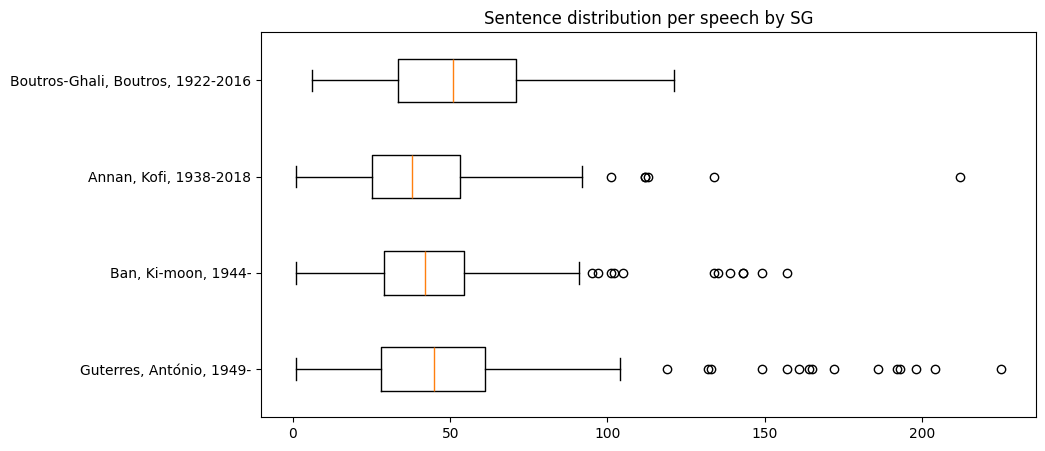

In [ ]:
order_sg_subset = ordered_sgs[0:4]
pldf = metadata_extracted.copy()
pldf_bxpl = [
    pldf[pldf.speaker == sg]["sentences"].dropna()
    for sg in order_sg_subset
    ]

plt.figure(figsize=(10,5))
plt.title("Sentence distribution per speech by SG")
conseal_output = plt.boxplot(
    pldf_bxpl,
    vert=False,
    tick_labels=order_sg_subset
    
)